# Binary Classification using **Logistic Regression**

## Introduction

Logistic regression is one of the most widely used methods **for classification problems**. While linear regression uses a line (or a **hyperplane** with as many dimensions as independent variables) to predict the **continuous value** of the response variable, logistic regression fits a curve to **predict the probability** that the outcome variable belongs to a particular category or not.

It is important to emphasize that, although it is called "regression," **logistic regression is primarily used to solve classification problems, not regression problems**. The name comes from the fact that it models the relationship between features and the **log-odds** (or logit) of the outcome using a linear function - which is a form of regression. However, it transforms this linear combination through the **sigmoid function** to output probabilities between 0 and 1. The final prediction is made by applying a threshold (typically 0.5) to these probabilities to assign a class label.

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## *Dataset*

In this example, we will analyze data from 100 students who applied for admission to a specific university. The selection process consists of two entrance exams and a second phase of personal interviews. We do not have data that allows us to quantify the students' performance in the personal interview, but we do have their exam scores and whether they were admitted or not. We will therefore consider two independent variables (the exam scores) and one dependent variable (admitted or not admitted).

In [19]:
df = pd.read_csv('data/ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
df.head()

,exam1,exam2,admitted
0,34.623660,78.024693,No
1,30.286711,43.894998,No
2,35.847409,72.902198,No
3,60.182599,86.308552,Yes
4,79.032736,75.344376,Yes


## Logistic Regression with a Single Independent Variable

To further simplify, **we will initially analyze the possibility of being admitted based on only one independent variable (the score on the first entrance exam)**.

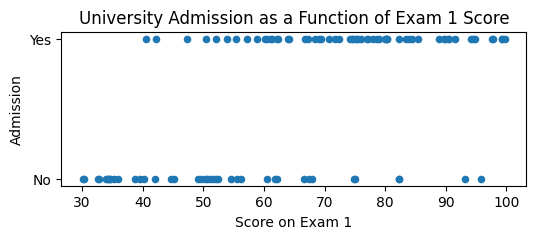

In [20]:
_ = df.plot(kind='scatter', # Create a scatter plot
        x='exam1',       # with 'exam1' on the x-axis
        xlabel='Score on Exam 1',
        y='admitted',    # and 'admitted' on the y-axis
        ylabel='Admission',
        figsize=(6, 2),  # Reduce the height of the plot
        title='University Admission as a Function of Exam 1 Score')

By displaying all the data in a scatter plot, we can observe that admitted students generally have higher scores than non-admitted students, but the relationship is not linear, as the dependent variable can only take two values (admitted or not admitted) and not continuous values.

Still, we can give this data a probabilistic interpretation, understanding that the probability of being admitted increases as the exam score increases. In this way, we can look for a curve that fits the data and allows us to predict the probability of being admitted as a function of the exam score. A probability of 1 would mean that the student is admitted with complete certainty, while a probability of 0 would mean that the student is not admitted at all.

To do this, we need to convert the dependent variable into a continuous variable that represents probability, and since the data we have is real a posteriori, their probability is known: those who were admitted ```(df['admitted'] == 'Yes')``` have a probability of 1, while those who were not admitted (df['admitted'] == 'No') have a probability of 0.

In [21]:
# Modify the values in the 'admitted' column to be 0 and 1
df['admitted'] = df['admitted'].map({'No': 0, 'Yes': 1})
# df['admitted'] = df['admitted'].replace('No', 0).replace('Yes', 1) # Alternative way to do it
df.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In these cases, the sigmoid function allows us to obtain a curve that fits the data, being flat at the extremes (probability 0 or 1) and with a steeper slope in the center, leaving a transition zone between those where the probability of being admitted is high or very low.

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

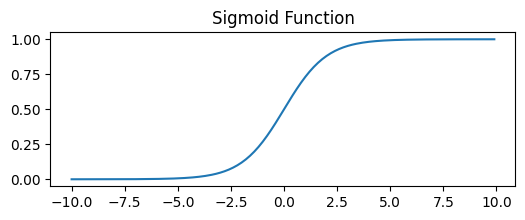

In [22]:
def sigmoid(x): # Sigmoid function
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1) # Example array for the sigmoid function

plt.figure(figsize=(6, 2))
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Function')
plt.show()

This is the function that logistic regression uses to convert the linear combination of inputs into a probability.

**How it works:** Logistic regression finds the best parameters (weights) using **maximum likelihood estimation** - it iteratively adjusts the weights to maximize the probability of observing the actual training data. Scikit-learn uses optimization algorithms like L-BFGS or SAG to find these optimal parameters.

We will use the ```LogisticRegression``` class from ```sklearn.linear_model``` to fit the model to our data:

In [23]:
from sklearn.linear_model import LogisticRegression
# max_iter increases the maximum number of iterations for convergence
model = LogisticRegression(max_iter=1000).fit(df[['exam1']], df['admitted'])

```df[['exam1']]``` is a DataFrame with only the column of scores from the first exam. It is important to remember that the fit method of the LogisticRegression class expects a DataFrame with the independent variables (since normally there will be more, each in its own column), and not a Series. That's why we use ```df[['exam1']]``` instead of ```df['exam1']```.

With that fitted model, we can obtain predictions for a new value, using the ```predict``` method in the same way as with linear regression:

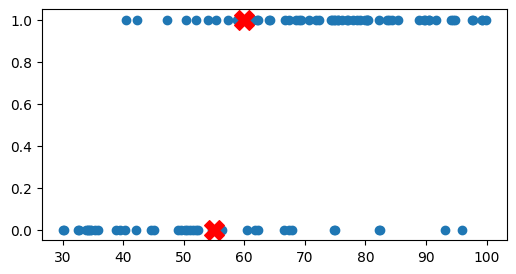

In [24]:
plt.figure(figsize=(6, 3))
plt.scatter(df['exam1'], df['admitted'])
new_scores = pd.DataFrame({'exam1': [55, 60]}) # Create a new DataFrame with two scores
plt.scatter(new_scores, model.predict(new_scores), color='red', marker='X', s=200)
plt.show()

We can observe how the model predicts that a student with a score of 55 will not be admitted, but one with a score of 60 will be. The model is calculating where the cutoff point of the sigmoid curve is to determine whether the probability of being admitted is greater or less than 0.5, but we can have more information if instead of the prediction directly, what we obtain is the probability of being admitted, using the `predict_proba` method.

In [25]:
print(model.classes_) # Classes detected by the model

proba_new_scores = model.predict_proba(new_scores)
print(proba_new_scores)

print(proba_new_scores[:,0]+proba_new_scores[:,1]) # The sum of the two columns is 1

proba_admit_new_scores = model.predict_proba(new_scores)[:,1]

[0 1]
[[0.5666404 0.4333596]
 [0.465986  0.534014 ]]
[1. 1.]


`predict_proba` returns an array with as many columns as possible values of the dependent variable (the categories). In this case the categories are 0 (not admitted) and 1 (admitted), as we can check in the `classes_` attribute of the model, so the array will have two columns, one with the probability of being admitted and another with the probability of not being admitted (which will be its complement, 1 - probability of being admitted).

Therefore, for this case, the information from the two columns is redundant, since if the probability of being admitted is 80%, the probability of not being admitted will be 20%, but normally we will have more than two categories, so it is important to keep in mind that the first column of the array is the probability of the first category, the second column is the probability of the second category, etc.

   exam1
0     55
1     60
[0.4333596 0.534014 ]


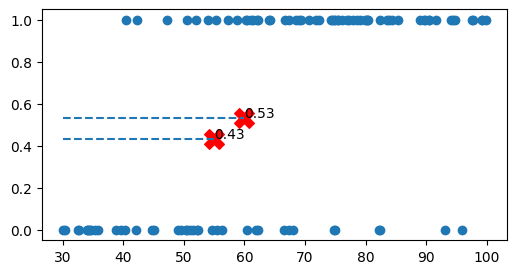

In [26]:
plt.figure(figsize=(6, 3))
plt.scatter(df['exam1'], df['admitted'])
print(new_scores)
print(proba_admit_new_scores)
plt.scatter(new_scores, proba_admit_new_scores, color='red', marker='X', s=200)

for i, txt in enumerate(np.round(proba_admit_new_scores, 2)): # For each value of proba_admit_new_scores, take its index and its rounded value
    plt.hlines(y=proba_admit_new_scores[i], xmin=30, xmax=new_scores['exam1'][i], linestyle='--') # Draw horizontal line from axis
    plt.annotate(txt, (new_scores['exam1'][i], proba_admit_new_scores[i])) # Annotate the value at the point

plt.show()

By creating an array of multiple possible values for X and generating their probabilities of being admitted, we can represent the sigmoid curve that fits the data:

In [27]:
x_sigmoid = np.linspace(30, 100, 1000) # Array of 1000 values between 30 and 100 (x-axis limits we are using)
df_sigmoid = pd.DataFrame({'exam1': x_sigmoid}) # Create a new DataFrame with those hypothetical scores
y_sigmoid = model.predict_proba(df_sigmoid[['exam1']]) # Calculate the y values for those scores

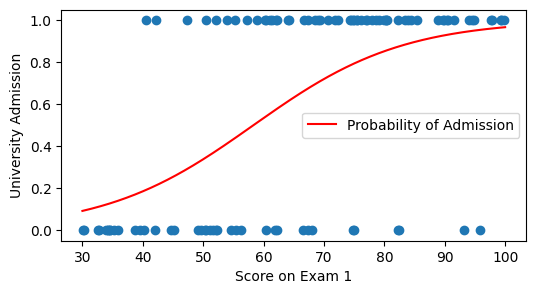

In [28]:
plt.figure(figsize=(6, 3))

plt.plot(x_sigmoid, y_sigmoid[:, 1], 'r-', label='Probability of Admission')

plt.scatter(df['exam1'], df['admitted'])
plt.xlabel('Score on Exam 1')
plt.ylabel('University Admission')
plt.legend()
plt.show()

We can additionally display the probability of the other category (not being admitted) to see how the sum of both probabilities is always 1.

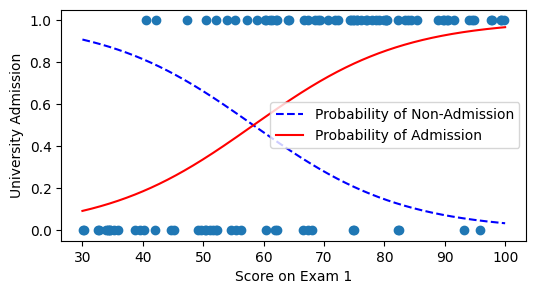

In [29]:
# We can additionally display the probability of the other category (not being admitted) to see how the sum of both probabilities is always 1.
plt.figure(figsize=(6, 3))
plt.plot(x_sigmoid, y_sigmoid[:, 0], 'b--', label='Probability of Non-Admission') # Probability of non-admission
plt.plot(x_sigmoid, y_sigmoid[:, 1], 'r-', label='Probability of Admission') # Probability of admission
plt.scatter(df['exam1'], df['admitted']) # Points from real data

plt.xlabel('Score on Exam 1')
plt.ylabel('University Admission')
plt.legend()
plt.show()

## Logistic Regression with Multiple Independent Variables

The normal approach will be to calculate this regression with both exam scores, since that's what we have. In this case, the sigmoid curve will be three-dimensional, as the probability of being admitted will depend on two independent variables.

We can do an initial exploration of the data by visualizing them with a scatter plot in which the color of the points indicates whether the student was admitted or not.

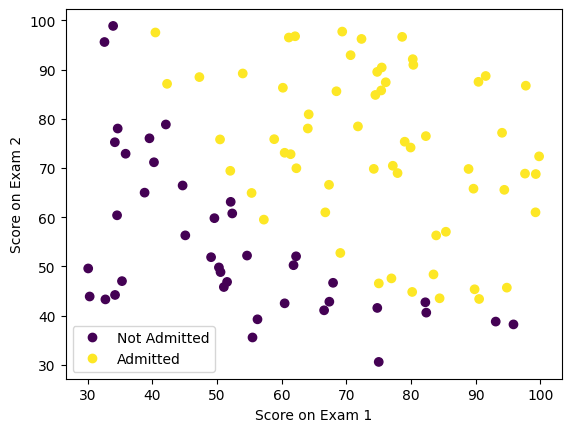

In [30]:
scatter = plt.scatter(df['exam1'], df['exam2'], c=df['admitted']) 
plt.xlabel("Score on Exam 1")
plt.ylabel("Score on Exam 2")
plt.legend(scatter.legend_elements()[0], ['Not Admitted', 'Admitted'])
plt.show()

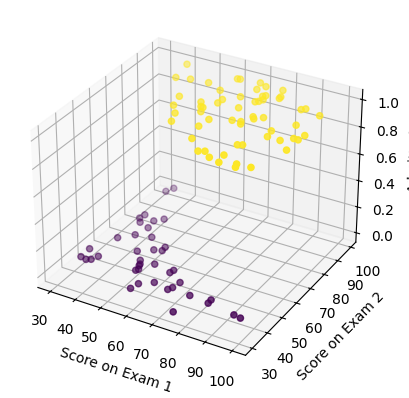

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = df['exam1']
y = df['exam2']
z = df['admitted']

scatter = ax.scatter(x, y, z, c=z, cmap='viridis')

ax.set_xlabel('Score on Exam 1')
ax.set_ylabel('Score on Exam 2')
ax.set_zlabel('Admitted')

plt.show()

As expected, admitted students tend to have higher scores on both exams than non-admitted students, but the relationship is not linear, so logistic regression is a good method to fit a curve to this data.

If we want to use more than one independent variable, the process is the same, but instead of using a DataFrame with a single column, we will use a DataFrame with as many columns as independent variables we have.

In [32]:
X = df.drop(columns='admitted') # Return dataframe without the 'admitted' column
y = df['admitted']

model_multi = LogisticRegression(max_iter=1000).fit(X, y)

# Note: These predictions use the single-variable model from before
# To use the multi-variable model, we would need both exam scores
print(f"Single exam model predictions (probabilities): {model.predict_proba(new_scores)[:,1]}")
print(f"Single exam model predictions (classes): {model.predict(new_scores)}")

Single exam model predictions (probabilities): [0.4333596 0.534014 ]
Single exam model predictions (classes): [0 1]


Instead of the 3D curve, we can simply represent in 2D the decision boundary (***decision boundary***), which is the place where the probability of being admitted is 50%.

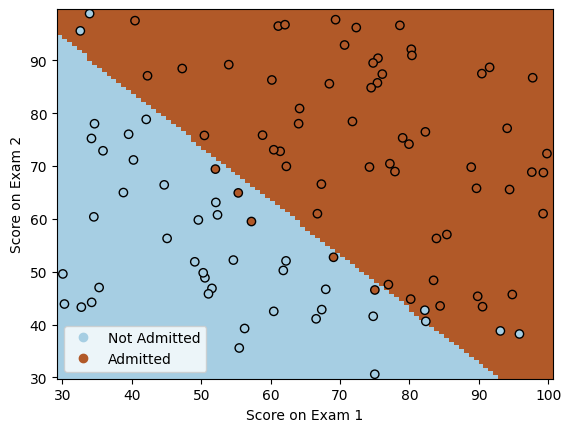

In [33]:
from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator( # Create a plot with the decision boundary
    model_multi,
    X,
    cmap='Paired',
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Score on Exam 1",
    ylabel="Score on Exam 2",
    eps=0.5,
)

scatter = plt.scatter(df['exam1'], df['exam2'], c=df['admitted'],
            edgecolors="k",
            cmap=plt.cm.Paired
            ) 

plt.xlabel("Score on Exam 1")
plt.ylabel("Score on Exam 2")
plt.legend(scatter.legend_elements()[0], ['Not Admitted', 'Admitted'])
plt.show()

## Sources and Supplementary Material
- https://aprendeia.com/algoritmo-regresion-logistica-machine-learning-teoria/
- https://cienciadedatos.net/documentos/py17-regresion-logistica-python.html
- https://nbviewer.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise2.ipynb
- https://realpython.com/logistic-regression-python/
- https://cesguiro.es/doku.php?id=clase:ia:saa:2eval:clasificacion_modelos_1